In [88]:
import pandas as pd
import numpy as np
import geopandas as gpd
import warnings
warnings.filterwarnings("ignore")
print(gpd.__version__)
import matplotlib.pyplot as plt

1.1.1


In [89]:
gdf = gpd.read_file("CALFIRE_DATA.geojson")
gdf.head()

,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,C_METHOD,OBJECTIVE,GIS_ACRES,COMMENTS,COMPLEX_NAME,IRWINID,FIRE_NUM,COMPLEX_ID,DECADES,geometry
0,1,2025.0,CA,CDF,LDF,PALISADES,00000738,"Tue, 07 Jan 2025 08:00:00 GMT","Fri, 31 Jan 2025 08:00:00 GMT",14,7.0,1.0,23448.8800,NaN,NaN,{A7EA5D21-F882-44B8-BF64-44AB11059DC1},NaN,NaN,2020-January 2025,"MULTIPOLYGON (((-13193558.265 4032826.468, -13..."
1,2,2025.0,CA,CDF,LAC,EATON,00009087,"Wed, 08 Jan 2025 08:00:00 GMT","Fri, 31 Jan 2025 08:00:00 GMT",14,7.0,1.0,14056.2600,NaN,NaN,{72660ADC-B5EF-4D96-A33F-B4EA3740A4E3},NaN,NaN,2020-January 2025,"MULTIPOLYGON (((-13146936.686 4051222.067, -13..."
2,3,2025.0,CA,CDF,ANF,HUGHES,00250270,"Wed, 22 Jan 2025 08:00:00 GMT","Tue, 28 Jan 2025 08:00:00 GMT",14,7.0,1.0,10396.8000,NaN,NaN,{994072D2-E154-434A-BB95-6F6C94C40829},NaN,NaN,2020-January 2025,"MULTIPOLYGON (((-13197885.239 4107084.744, -13..."
3,4,2025.0,CA,CCO,VNC,KENNETH,00003155,"Thu, 09 Jan 2025 08:00:00 GMT","Tue, 04 Feb 2025 08:00:00 GMT",14,2.0,1.0,998.7378,from OES Intel 24,NaN,{842FB37B-7AC8-4700-BB9C-028BF753D149},NaN,NaN,2020-January 2025,"POLYGON ((-13211054.577 4051508.758, -13211051..."
4,5,2025.0,CA,CDF,LDF,HURST,00003294,"Tue, 07 Jan 2025 08:00:00 GMT","Thu, 09 Jan 2025 08:00:00 GMT",14,7.0,1.0,831.3855,NaN,NaN,{F4E810AD-CDF3-4ED4-B63F-03D43785BA7B},NaN,NaN,2020-January 2025,"POLYGON ((-13187991.688 4073306.403, -13187979..."


In [90]:
print("Rows:", len(gdf))
print("Columns:", list(gdf.columns))
gdf.head()

Rows: 22810
Columns: ['OBJECTID', 'YEAR_', 'STATE', 'AGENCY', 'UNIT_ID', 'FIRE_NAME', 'INC_NUM', 'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'C_METHOD', 'OBJECTIVE', 'GIS_ACRES', 'COMMENTS', 'COMPLEX_NAME', 'IRWINID', 'FIRE_NUM', 'COMPLEX_ID', 'DECADES', 'geometry']


,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,C_METHOD,OBJECTIVE,GIS_ACRES,COMMENTS,COMPLEX_NAME,IRWINID,FIRE_NUM,COMPLEX_ID,DECADES,geometry
0,1,2025.0,CA,CDF,LDF,PALISADES,00000738,"Tue, 07 Jan 2025 08:00:00 GMT","Fri, 31 Jan 2025 08:00:00 GMT",14,7.0,1.0,23448.8800,NaN,NaN,{A7EA5D21-F882-44B8-BF64-44AB11059DC1},NaN,NaN,2020-January 2025,"MULTIPOLYGON (((-13193558.265 4032826.468, -13..."
1,2,2025.0,CA,CDF,LAC,EATON,00009087,"Wed, 08 Jan 2025 08:00:00 GMT","Fri, 31 Jan 2025 08:00:00 GMT",14,7.0,1.0,14056.2600,NaN,NaN,{72660ADC-B5EF-4D96-A33F-B4EA3740A4E3},NaN,NaN,2020-January 2025,"MULTIPOLYGON (((-13146936.686 4051222.067, -13..."
2,3,2025.0,CA,CDF,ANF,HUGHES,00250270,"Wed, 22 Jan 2025 08:00:00 GMT","Tue, 28 Jan 2025 08:00:00 GMT",14,7.0,1.0,10396.8000,NaN,NaN,{994072D2-E154-434A-BB95-6F6C94C40829},NaN,NaN,2020-January 2025,"MULTIPOLYGON (((-13197885.239 4107084.744, -13..."
3,4,2025.0,CA,CCO,VNC,KENNETH,00003155,"Thu, 09 Jan 2025 08:00:00 GMT","Tue, 04 Feb 2025 08:00:00 GMT",14,2.0,1.0,998.7378,from OES Intel 24,NaN,{842FB37B-7AC8-4700-BB9C-028BF753D149},NaN,NaN,2020-January 2025,"POLYGON ((-13211054.577 4051508.758, -13211051..."
4,5,2025.0,CA,CDF,LDF,HURST,00003294,"Tue, 07 Jan 2025 08:00:00 GMT","Thu, 09 Jan 2025 08:00:00 GMT",14,7.0,1.0,831.3855,NaN,NaN,{F4E810AD-CDF3-4ED4-B63F-03D43785BA7B},NaN,NaN,2020-January 2025,"POLYGON ((-13187991.688 4073306.403, -13187979..."


In [91]:
gdf.columns = (gdf.columns.str.strip()
                           .str.lower()
                           .str.replace(r"\s+", "_", regex=True)
                           .str.replace(r"[^0-9a-zA-Z_]+", "", regex=True)
              )

gdf.head()



,objectid,year_,state,agency,unit_id,fire_name,inc_num,alarm_date,cont_date,cause,c_method,objective,gis_acres,comments,complex_name,irwinid,fire_num,complex_id,decades,geometry
0,1,2025.0,CA,CDF,LDF,PALISADES,00000738,"Tue, 07 Jan 2025 08:00:00 GMT","Fri, 31 Jan 2025 08:00:00 GMT",14,7.0,1.0,23448.8800,NaN,NaN,{A7EA5D21-F882-44B8-BF64-44AB11059DC1},NaN,NaN,2020-January 2025,"MULTIPOLYGON (((-13193558.265 4032826.468, -13..."
1,2,2025.0,CA,CDF,LAC,EATON,00009087,"Wed, 08 Jan 2025 08:00:00 GMT","Fri, 31 Jan 2025 08:00:00 GMT",14,7.0,1.0,14056.2600,NaN,NaN,{72660ADC-B5EF-4D96-A33F-B4EA3740A4E3},NaN,NaN,2020-January 2025,"MULTIPOLYGON (((-13146936.686 4051222.067, -13..."
2,3,2025.0,CA,CDF,ANF,HUGHES,00250270,"Wed, 22 Jan 2025 08:00:00 GMT","Tue, 28 Jan 2025 08:00:00 GMT",14,7.0,1.0,10396.8000,NaN,NaN,{994072D2-E154-434A-BB95-6F6C94C40829},NaN,NaN,2020-January 2025,"MULTIPOLYGON (((-13197885.239 4107084.744, -13..."
3,4,2025.0,CA,CCO,VNC,KENNETH,00003155,"Thu, 09 Jan 2025 08:00:00 GMT","Tue, 04 Feb 2025 08:00:00 GMT",14,2.0,1.0,998.7378,from OES Intel 24,NaN,{842FB37B-7AC8-4700-BB9C-028BF753D149},NaN,NaN,2020-January 2025,"POLYGON ((-13211054.577 4051508.758, -13211051..."
4,5,2025.0,CA,CDF,LDF,HURST,00003294,"Tue, 07 Jan 2025 08:00:00 GMT","Thu, 09 Jan 2025 08:00:00 GMT",14,7.0,1.0,831.3855,NaN,NaN,{F4E810AD-CDF3-4ED4-B63F-03D43785BA7B},NaN,NaN,2020-January 2025,"POLYGON ((-13187991.688 4073306.403, -13187979..."


In [92]:
date_columns = ["alarm_date", "cont_date"]

for col in date_columns:
    if col in gdf.columns:
        gdf[col] = pd.to_datetime(gdf[col], errors="coerce")

gdf.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 22810 entries, 0 to 22809
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   objectid      22810 non-null  int32         
 1   year_         22733 non-null  float64       
 2   state         22810 non-null  str           
 3   agency        22761 non-null  str           
 4   unit_id       22749 non-null  str           
 5   fire_name     22748 non-null  str           
 6   inc_num       21839 non-null  str           
 7   alarm_date    17414 non-null  datetime64[us]
 8   cont_date     10180 non-null  datetime64[us]
 9   cause         22810 non-null  int32         
 10  c_method      10708 non-null  float64       
 11  objective     22539 non-null  float64       
 12  gis_acres     22810 non-null  float64       
 13  comments      2835 non-null   str           
 14  complex_name  611 non-null    str           
 15  irwinid       3736 non-null 

In [93]:
if "year_" in gdf.columns:
    gdf = gdf[gdf["year_"] >= 2020]

print("After year filter:", len(gdf))


After year filter: 2036


In [94]:
if "gis_acres" in gdf.columns:
    gdf = gdf[gdf["gis_acres"] >= 500]

print("After size filter:", len(gdf))


After size filter: 300


In [95]:
if "alarm_date" in gdf.columns and "cont_date" in gdf.columns:
    gdf["fire_duration"] = (gdf["cont_date"] - gdf["alarm_date"]).dt.days

In [96]:
print(gdf.crs)


EPSG:3857


In [97]:
gdf = gdf.to_crs(epsg=4326)


In [98]:
print(gdf.crs)

EPSG:4326


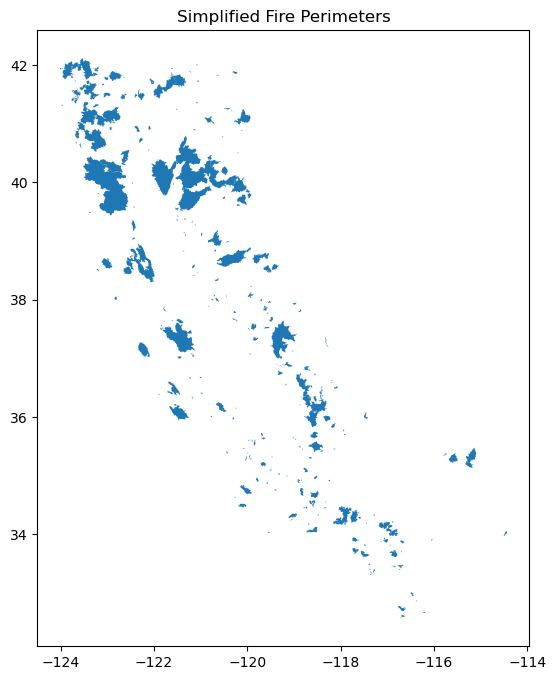

In [99]:
gdf.plot(figsize=(8,8))
plt.title("Simplified Fire Perimeters")
plt.show()


In [100]:
gdf.memory_usage(deep=True).sum() / 1024 / 1024


np.float64(0.18542861938476562)

In [101]:
gdf.describe()

,objectid,year_,alarm_date,cont_date,cause,c_method,objective,gis_acres,fire_duration
count,300.000000,300.000000,300,298,300.000000,300.000000,298.000000,3.000000e+02,298.000000
mean,910.653333,2021.810000,2022-05-16 03:08:36,2022-06-16 20:20:20.134228,8.503333,4.486667,1.033557,2.772607e+04,32.275168
min,1.000000,2020.000000,2020-05-31 07:00:00,2020-06-04 07:00:00,1.000000,1.000000,1.000000,5.078524e+02,0.000000
25%,76.750000,2020.000000,2020-08-24 07:00:00,2020-11-03 20:00:00,1.000000,2.000000,1.000000,9.159152e+02,5.000000
50%,1149.500000,2021.000000,2021-09-04 07:00:00,2021-12-12 08:00:00,10.000000,4.500000,1.000000,2.476092e+03,13.000000
75%,1559.250000,2024.000000,2024-05-23 01:00:00,2024-05-22 19:00:00,14.000000,7.000000,1.000000,1.223164e+04,43.000000
max,1634.000000,2025.000000,2025-01-22 08:00:00,2025-02-04 08:00:00,18.000000,8.000000,2.000000,1.032700e+06,369.000000
std,613.256765,1.654193,NaN,NaN,5.701316,2.644453,0.180389,9.780427e+04,42.886956


<Axes: >

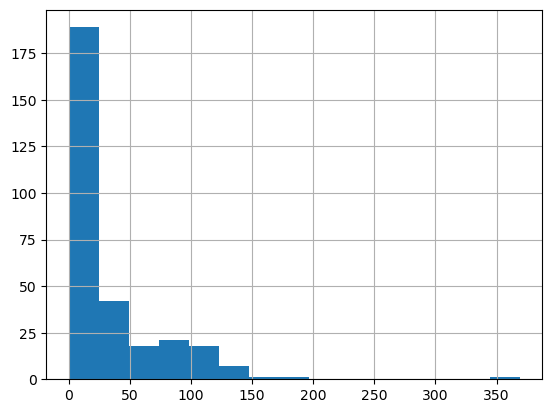

In [102]:
gdf["fire_duration"].hist(bins=15)

In [103]:
gdf["fire_duration"].quantile([0.25, 0.5, 0.75, 0.9])


0.25     5.0
0.50    13.0
0.75    43.0
0.90    95.0
Name: fire_duration, dtype: float64

In [104]:
gdf["duration_bucket"] = pd.cut(
    gdf["fire_duration"],
    bins=[0, 5, 14, 45, 95, 365],
    labels=[
        "0–5 days (initial attack)",
        "6–14 days (short duration)",
        "15–45 days (extended attack)",
        "46–95 days (long duration)",
        "95+ days (campaign fire)"
    ],
    right=True
)


In [105]:
gdf.head()

,objectid,year_,state,agency,unit_id,fire_name,inc_num,alarm_date,cont_date,cause,...,gis_acres,comments,complex_name,irwinid,fire_num,complex_id,decades,geometry,fire_duration,duration_bucket
0,1,2025.0,CA,CDF,LDF,PALISADES,00000738,2025-01-07 08:00:00,2025-01-31 08:00:00,14,...,23448.8800,NaN,NaN,{A7EA5D21-F882-44B8-BF64-44AB11059DC1},NaN,NaN,2020-January 2025,"MULTIPOLYGON (((-118.51975 34.02997, -118.5198...",24.0,15–45 days (extended attack)
1,2,2025.0,CA,CDF,LAC,EATON,00009087,2025-01-08 08:00:00,2025-01-31 08:00:00,14,...,14056.2600,NaN,NaN,{72660ADC-B5EF-4D96-A33F-B4EA3740A4E3},NaN,NaN,2020-January 2025,"MULTIPOLYGON (((-118.10094 34.16681, -118.1009...",23.0,15–45 days (extended attack)
2,3,2025.0,CA,CDF,ANF,HUGHES,00250270,2025-01-22 08:00:00,2025-01-28 08:00:00,14,...,10396.8000,NaN,NaN,{994072D2-E154-434A-BB95-6F6C94C40829},NaN,NaN,2020-January 2025,"MULTIPOLYGON (((-118.55862 34.58099, -118.5585...",6.0,6–14 days (short duration)
3,4,2025.0,CA,CCO,VNC,KENNETH,00003155,2025-01-09 08:00:00,2025-02-04 08:00:00,14,...,998.7378,from OES Intel 24,NaN,{842FB37B-7AC8-4700-BB9C-028BF753D149},NaN,NaN,2020-January 2025,"POLYGON ((-118.67692 34.16894, -118.6769 34.16...",26.0,15–45 days (extended attack)
4,5,2025.0,CA,CDF,LDF,HURST,00003294,2025-01-07 08:00:00,2025-01-09 08:00:00,14,...,831.3855,NaN,NaN,{F4E810AD-CDF3-4ED4-B63F-03D43785BA7B},NaN,NaN,2020-January 2025,"POLYGON ((-118.46974 34.33079, -118.46964 34.3...",2.0,0–5 days (initial attack)


In [106]:
gdf["objective"].unique()

array([ 1.,  2., nan])

In [107]:
keep_cols = [
    "irwinid",
    "fire_name",
    "agency",
    "year_",
    "alarm_date",
    "cont_date",
    "fire_duration",
    "duration_bucket",
    "c_method",
    "objective",
    "cause",
    "gis_acres",
    "geometry"
]

gdf = gdf[keep_cols]


In [108]:
gdf.head()

,irwinid,fire_name,agency,year_,alarm_date,cont_date,fire_duration,duration_bucket,c_method,objective,cause,gis_acres,geometry
0,{A7EA5D21-F882-44B8-BF64-44AB11059DC1},PALISADES,CDF,2025.0,2025-01-07 08:00:00,2025-01-31 08:00:00,24.0,15–45 days (extended attack),7.0,1.0,14,23448.8800,"MULTIPOLYGON (((-118.51975 34.02997, -118.5198..."
1,{72660ADC-B5EF-4D96-A33F-B4EA3740A4E3},EATON,CDF,2025.0,2025-01-08 08:00:00,2025-01-31 08:00:00,23.0,15–45 days (extended attack),7.0,1.0,14,14056.2600,"MULTIPOLYGON (((-118.10094 34.16681, -118.1009..."
2,{994072D2-E154-434A-BB95-6F6C94C40829},HUGHES,CDF,2025.0,2025-01-22 08:00:00,2025-01-28 08:00:00,6.0,6–14 days (short duration),7.0,1.0,14,10396.8000,"MULTIPOLYGON (((-118.55862 34.58099, -118.5585..."
3,{842FB37B-7AC8-4700-BB9C-028BF753D149},KENNETH,CCO,2025.0,2025-01-09 08:00:00,2025-02-04 08:00:00,26.0,15–45 days (extended attack),2.0,1.0,14,998.7378,"POLYGON ((-118.67692 34.16894, -118.6769 34.16..."
4,{F4E810AD-CDF3-4ED4-B63F-03D43785BA7B},HURST,CDF,2025.0,2025-01-07 08:00:00,2025-01-09 08:00:00,2.0,0–5 days (initial attack),7.0,1.0,14,831.3855,"POLYGON ((-118.46974 34.33079, -118.46964 34.3..."


In [109]:
gdf["geometry"] = gdf["geometry"].simplify(
    tolerance=0.001,
    preserve_topology=True
)


In [110]:
gdf["centroid"] = gdf.geometry.centroid
gdf["lat"] = gdf["centroid"].y
gdf["lon"] = gdf["centroid"].x


In [111]:
df_export = gdf.drop(columns=["geometry"])


In [112]:
df_export.to_csv("calfire_cleaned.csv", index=False)
